**Ηλιόπουλος Νικόλας 1115201800332**

# Imports & Functions

In [26]:
import os
import PIL
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

import warnings

#suppress warnings
warnings.filterwarnings('ignore')

# [Ερώτημα 1: Logistic regression & Overfitting]
Για μεγάλες τιμές της παραμέτρου w Logistic Regression εμφανίζει συμπεριφορά overfitting αφού αυξάνεται η πιθανότητα να πάρει extreme value 0, 1 και μειώνεται η πιθανότητα να πάρει κάποια άλλη τιμή.
Το μοντέλο δηλαδή αυξάνει τα βάρη στα extreme value οδηγώντας το σε overfitting.

Με regularization στην παράμετρο w θα αντιμετοπιστεί το overfitting καθώς το regularization προσθέτει μία cost function που ισοσταθμίζει τα extreme value.

Θα χρήσιμοποιούσα την L2-Regularization (penalty which is equal to the square of the magnitude of coefficients) αφού λαμβάνει υπόψη τα τετράγωνα των βαρών με αποτέλεσμα όσο μεγαλύτερο ή μικρότερο το extreme value τόσο αυξάνεται το κόστος.

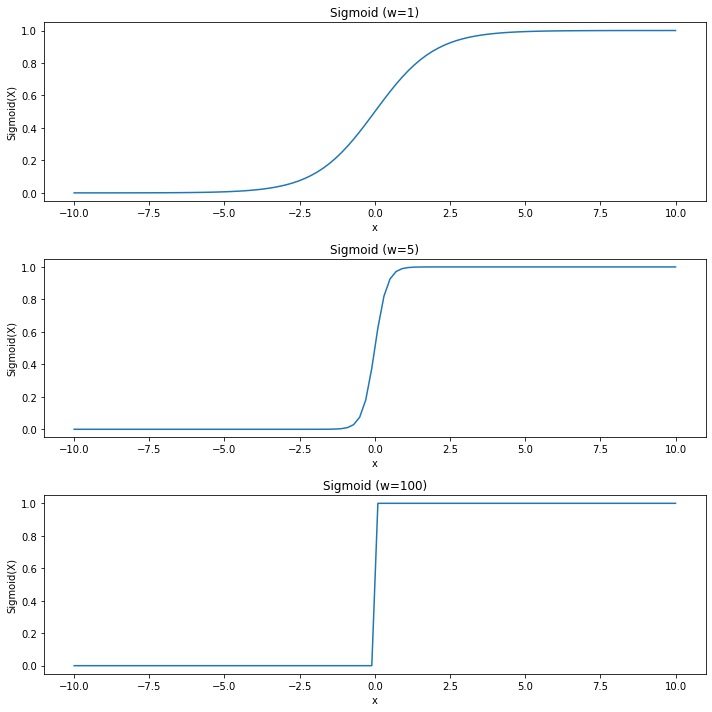

In [27]:
def sigmoid(x, w):
    return 1 / (1 + np.exp(-w * x))

x = np.linspace(-10,10,100)

figure = plt.figure(figsize=(10, 10))

for (i, w) in enumerate([1,5,100], start = 1):
  figure.add_subplot(3, 1, i)
  plt.plot(x, sigmoid(w,x))
  plt.xlabel("x")
  plt.ylabel("Sigmoid(X)")
  plt.title(f"Sigmoid (w={w})")

plt.tight_layout()
plt.show()

# [Ερώτημα 2: Ridge regression]

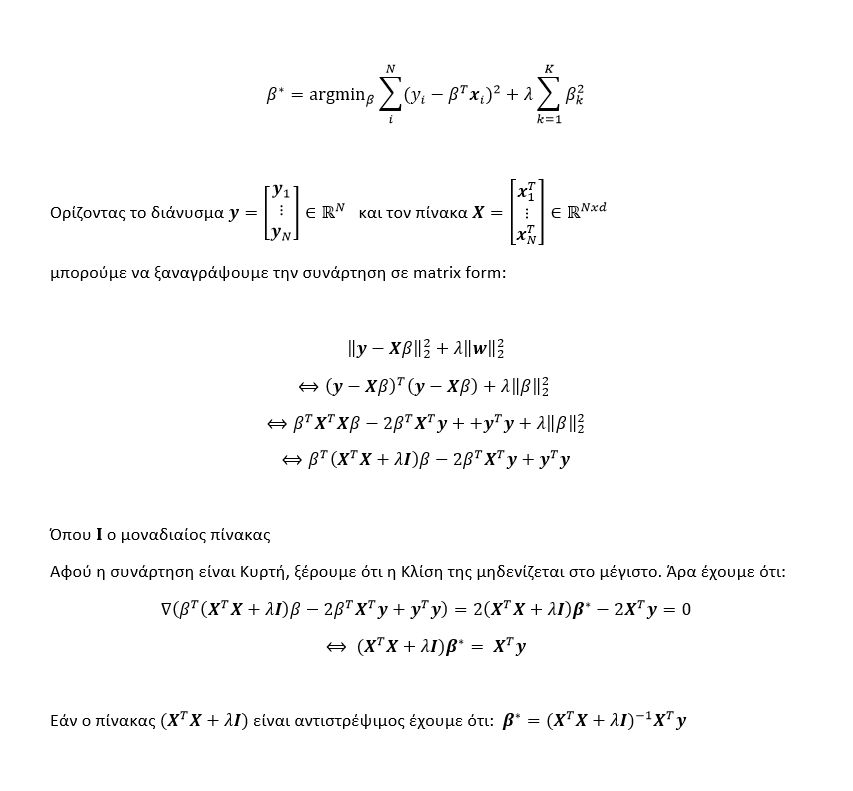

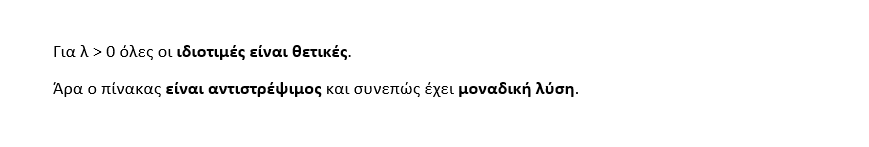

# [Ερώτημα 3: Αναγνώριση Προσώπων (Face recognition)]

In [28]:
folderPath = '/content/drive/MyDrive/Colab Notebooks/dataSets/faces'
setList = [
  {
  "name":'Set_1',
  "lower": 0,
  "upper": 7
  },
  {
  "name":'Set_2',
  "lower": 8,
  "upper": 19
  },
  {
  "name":'Set_3',
  "lower": 20,
  "upper": 31
  },
  {
  "name":'Set_4',
  "lower": 32,
  "upper": 45
  },
  {
  "name":'Set_5',
  "lower": 46,
  "upper": 64
  }
]

components = [9, 30]

## i

In [29]:
def getNumberOfPhoto(filename):
  return int(filename[-6:-4])

def getPersonOfPhoto(filename):
  return filename[-9:-7]

def getFilenamesOfDir(path):
  for (dirpath, dirnames, filenames) in os.walk(path):
    break
  return filenames

def calculateSetOfPhoto(filename):
  numberOfPhoto = getNumberOfPhoto(filename)
  for Set in setList:
    if (numberOfPhoto >= Set['lower']) and (numberOfPhoto <= Set['upper']):
      return Set['name']

def loadImages(path, setName):
  k = 0 
  images = []
  labels = []
  data = []

  filenames = getFilenamesOfDir(path)
  filenames.sort()
  
  for filename in filenames:
    if setName == calculateSetOfPhoto(filename):
        images.append(folderPath + '/' + filename)
        labels.append(getPersonOfPhoto(filename))

  for image in images:
    image_pixels = np.array(PIL.Image.open(image)).flatten().tolist()
    image_pixels_mean = np.mean(image_pixels)
    image_pixels_std = np.std(image_pixels)
    data.append([(image_pixel - image_pixels_mean) / image_pixels_std for image_pixel in image_pixels])

  return pd.DataFrame(data), pd.DataFrame(labels)

## ii
Το μοντέλο έγινε train με 70 εικόνες (Set_1) οι οποίες ήταν με καλό φωτισμό. Είναι λογικό όταν το τεστάρουμε σε εικόνες με χαμηλό φωτισμό να μην αποδίδει καλά.

Από τα αποτελέσματα βλέπουμε ότι δεν έχει γίνει γενίκευση, αφού όσο αυξάνεται το set (ποιο σκοτινές εικόνες) η απόδοση πέφτει.

Επίσης η διαφορά με d=9 και d=30 είναι λογική, αφού υπάρχει περισσότερη πληροφορία (ιδιοδυανύσματα) με το d=30 άρα κατάφέρνει καλύτερο score. 

In [30]:
XTrain, yTrain = loadImages(folderPath, setList[0]['name']) # Set_1
storedPCAs = []
for component in components:
  print("Component: ",component)

  pca = PCA(n_components=component, whiten=True)
  
  pca = pca.fit(XTrain.values)
  XTrain_pca = pca.transform(XTrain)
  
  classifier = KNeighborsClassifier(n_neighbors = 1)
  classifier.fit(XTrain_pca, yTrain.values.ravel())

  for Set in setList:
    XTest,yTest = loadImages(folderPath, Set['name'])
    XTest_pca = pca.transform(XTest)
    print(Set['name'], ": score =", classifier.score(XTest_pca, yTest))
  storedPCAs.append({
                    "component": component,
                    "pca": pca
                    })

Component:  9
Set_1 : score = 1.0
Set_2 : score = 1.0
Set_3 : score = 0.8583333333333333
Set_4 : score = 0.36428571428571427
Set_5 : score = 0.13157894736842105
Component:  30
Set_1 : score = 1.0
Set_2 : score = 0.9583333333333334
Set_3 : score = 0.925
Set_4 : score = 0.5642857142857143
Set_5 : score = 0.19473684210526315


## iii

Component:  9


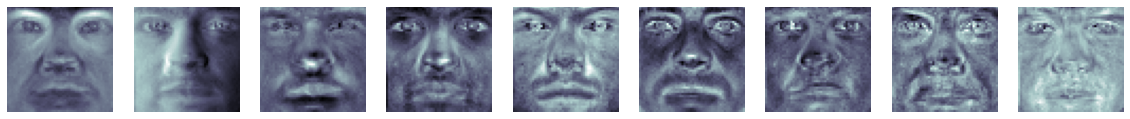

Component:  30


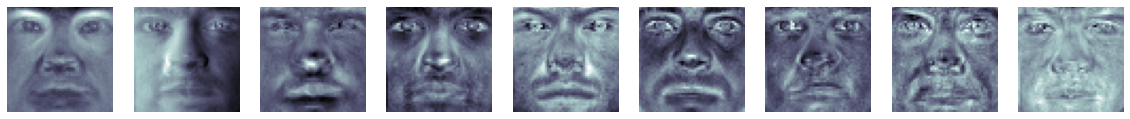

In [31]:
for storedPCA in storedPCAs:
  component = storedPCA['component']
  pca = storedPCA['pca']
  print("Component: ",component)

  figure = plt.figure(figsize=(20, 20))
  top_eigenvectors = []

  for component in pca.components_[:9]:
    top_eigenvectors.append(component.reshape((50, 50)))

  for (i, top_eigenvector) in enumerate(top_eigenvectors, start = 1):
    figure.add_subplot(1, 9, i)
    plt.imshow(top_eigenvector, 'bone')
    plt.axis('off')
  plt.show()

## iv

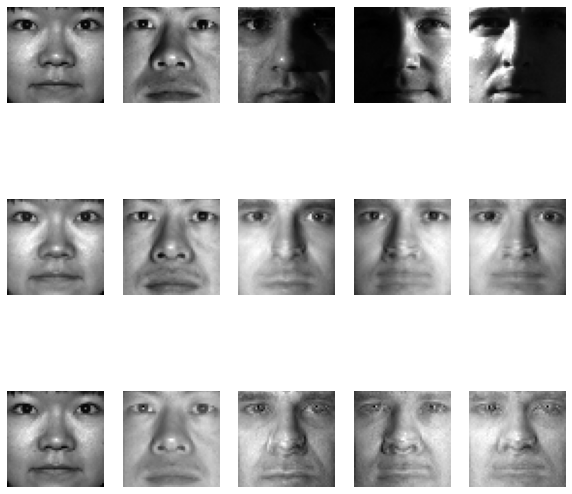

In [32]:
figure = plt.figure(figsize=(10, 10))

random_original_images = []
for (i, Set) in enumerate(setList, start=1):
  # get a random image from the specific set
  original_images, labels = loadImages(folderPath, Set['name'])

  random_number = np.random.randint(0, original_images.shape[0] - 1)

  original_image = original_images.values[random_number]
  random_original_images.append(original_image)

  plt.subplot(3, 5, i)
  plt.imshow(original_image.reshape(50, 50), 'binary_r')
  plt.axis('off')

row = 5
for storedPCA in storedPCAs:
  component = storedPCA['component']
  pca = storedPCA['pca']

  for (i, Set) in enumerate(setList, start=1):
    # tranform with the random image
    reconstracted = pca.transform(random_original_images[i-1].reshape(1, -1))
    # generate a new image
    X_proj = pca.inverse_transform(reconstracted)
    plt.subplot(3, 5, i+row)
    plt.imshow(X_proj[0].reshape(50, 50), 'binary_r')
    plt.axis('off')
  row+=5
plt.show()

## v
Ναι διαφέρουν τα eigenfaces με τα αντίστοιχα singular vectors από το SVD.

To PCA κανει normalizations. Οπότε είναι λογικό να είναι διαφορετικά.

Component:  9


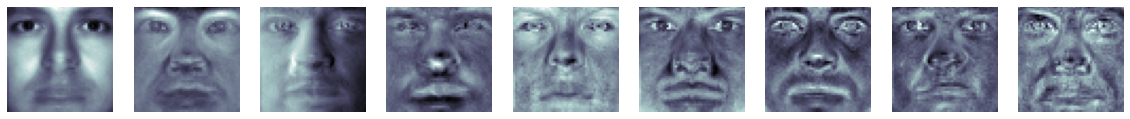

Component:  30


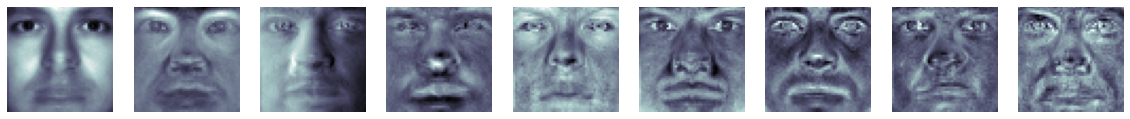

In [33]:
for storedPCA in storedPCAs:
  component = storedPCA['component']
  pca = storedPCA['pca']
  print("Component: ",component)

  svd = TruncatedSVD(n_components = component).fit(XTrain);
  X_train_svd = pca.transform(XTrain)
  vectors = [];
  fig = plt.figure(figsize=(20, 20));

  for component in svd.components_[:9]:
      vector = component.reshape((50, 50));
      vectors.append(vector);

  for (i,image) in enumerate(vectors,start=1):
    fig.add_subplot(1, 9, i);
    plt.imshow(image, 'bone');
    plt.axis('off');
  plt.show();